# Product Sales Analysis

In [31]:
# Import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

In [83]:
#Load the dataset

files = [file for file in os.listdir('./Sales_Data')]
all_month_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_month_data = pd.concat([all_month_data, df])
all_month_data.to_csv('final_data.csv', index= False)

In [7]:
data = pd.read_csv("final_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [29]:
# Removing all NaN values
data = data.dropna(how ='all')
# Removing raws on based condition 'or' from data
data = data[data['Order Date'].str[0:2] != 'or']

# Add Month Column
data['Month'] = data['Order Date'].str[0:2]
data['Month'] = data['Month'].astype('int32')

# Converting Quantity Ordered and Price Each into numeric.
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

#Add Sales Column
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Questions

### 1. What was the best month for sales? How much was earned that month?

In [30]:
data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


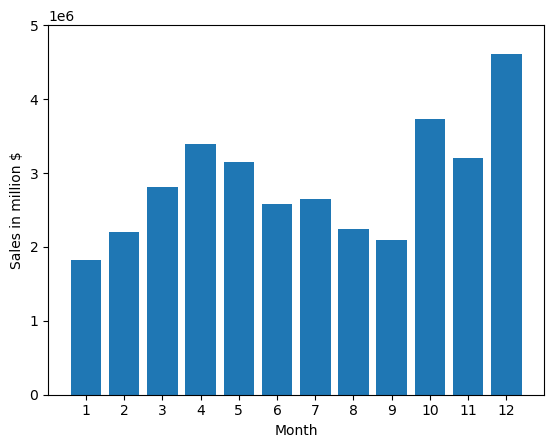

In [43]:
# Visualising the results

months = range(1,13)
results = data.groupby('Month').sum()
plt.bar(months, results['Sales'])
plt.xticks(months)
labels, location = plt.yticks()
plt.yticks(labels)
plt.xlabel("Month")
plt.ylabel("Sales in million $")
plt.show()

### The best month for sales is December. The company earned approx. $4,810,000.

### 2. What city sold the most product?

In [45]:
#Add city columns

def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

# Extract the city and state name
data['City'] = data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [46]:
result2 = data.groupby('City').sum()
result2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


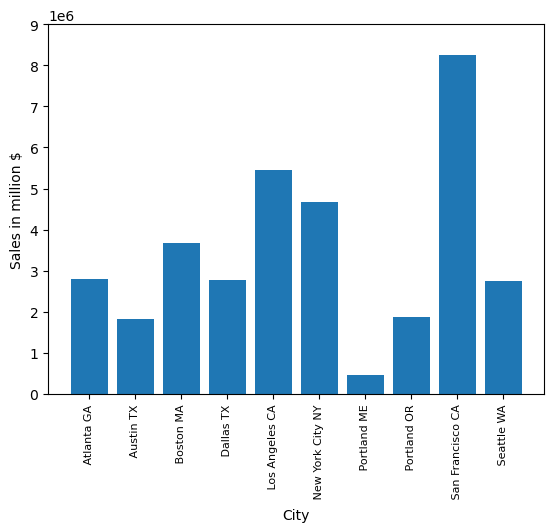

In [48]:
cities = [city for city, df in data.groupby('City')]

plt.bar(cities, result2['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
labels, location = plt.yticks()
plt.yticks(labels)
plt.xlabel("City")
plt.ylabel("Sales in million $")
plt.show()

### San Fransisco is the city with the highest sales.

### 3. What time should we display advertisements to maximize likelihood of customers's buying product?

In [53]:
# Create new column in date-time object (DTO)
data['Order_Date_DTO'] = pd.to_datetime(data['Order Date'])

# Extract the hours data
data['Hour'] = data['Order_Date_DTO'].dt.hour

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order_Date_DTO,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30 09:27:00,9


In [54]:
result3 = data.groupby('Hour').count()
result3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order_Date_DTO
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


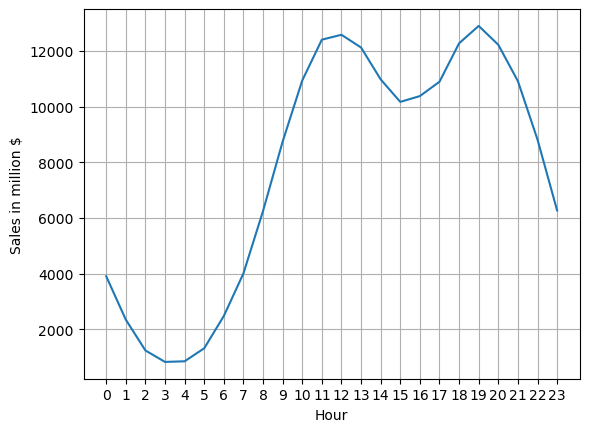

In [55]:
result3 = data.groupby(['Hour'])['Quantity Ordered'].count()
hours = [hour for hour, df in data.groupby('Hour')]

plt.plot(hours, result3)
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Sales in million $")
plt.grid()
plt.show()

### I suggest to advertise the products right before 12 Noon and/or 7 PM. It should be 11:30 AM and/or 6:30 PM.

### 4. What products are most often sold together?

In [59]:
# Removing duplicate Order IDs
new = data[data['Order ID'].duplicated(keep = False)]
new.head()

# Joining the products of same Order ID in same line
new['Product Bundle'] = new.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Dropping duplicate values
new = new[['Order ID', 'Product Bundle']].drop_duplicates()

new.head()

C:\Users\mohit\AppData\Local\Temp\ipykernel_17352\1618241207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Product Bundle'] = new.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product Bundle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [60]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in new['Product Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))
count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

### The most often products sold together are iPhone and Lightning Charging cable with 1005 transactions.

### 5. What product sold most? Why do you think it did?

In [74]:
# Grouping the product 

product_group = data.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


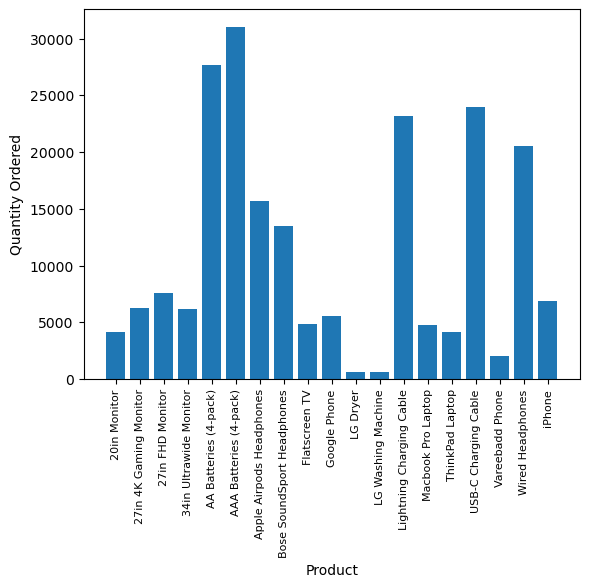

In [76]:
# Visualising

quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_17352\163550547.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


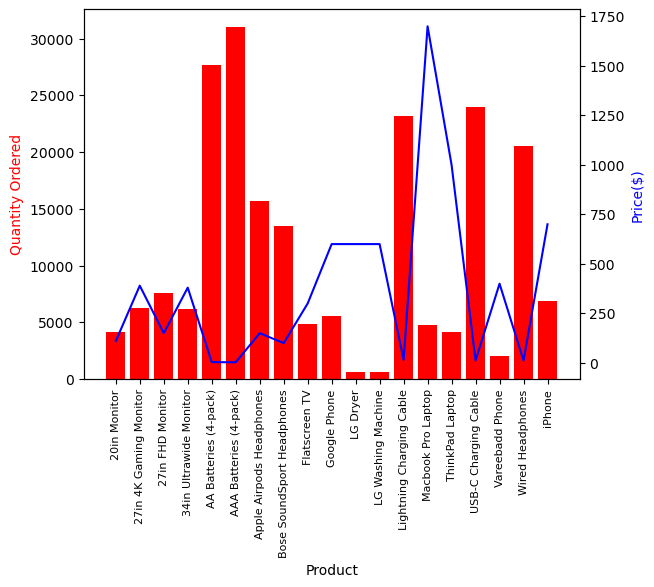

In [82]:
# Overlaying a second y-axis on chart

prices = data.groupby('Product').mean()['Price Each']
flg, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'r')
ax2.plot(products, prices, 'b')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color = 'r')
ax2.set_ylabel('Price($)', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
                
plt.show()

### AAA Batteries(4 pack) is the most sold product because it is cheaper than other products and has high demand.

